In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer()
df.target[[10,50,80]]
list(df.target_names)

[np.str_('malignant'), np.str_('benign')]

In [3]:
df_features = pd.DataFrame(df.data, columns=df.feature_names)
df_target   = pd.DataFrame(df.target, columns =['target'])

df_combined = pd.concat([df_features, df_target],axis=1)

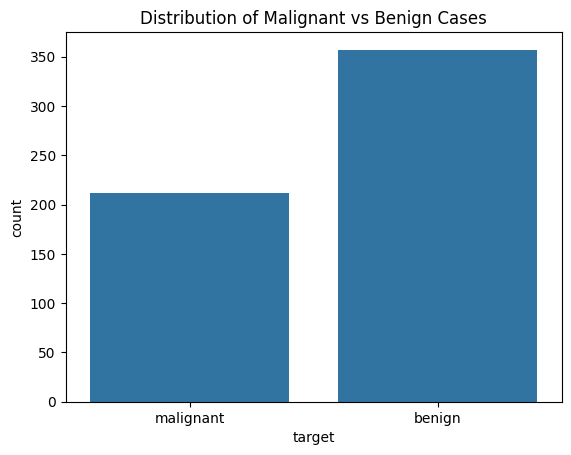

In [4]:
sns.countplot(x='target',data=df_combined)
plt.title('Distribution of Malignant vs Benign Cases')
plt.xticks([0,1],df.target_names)
plt.show()

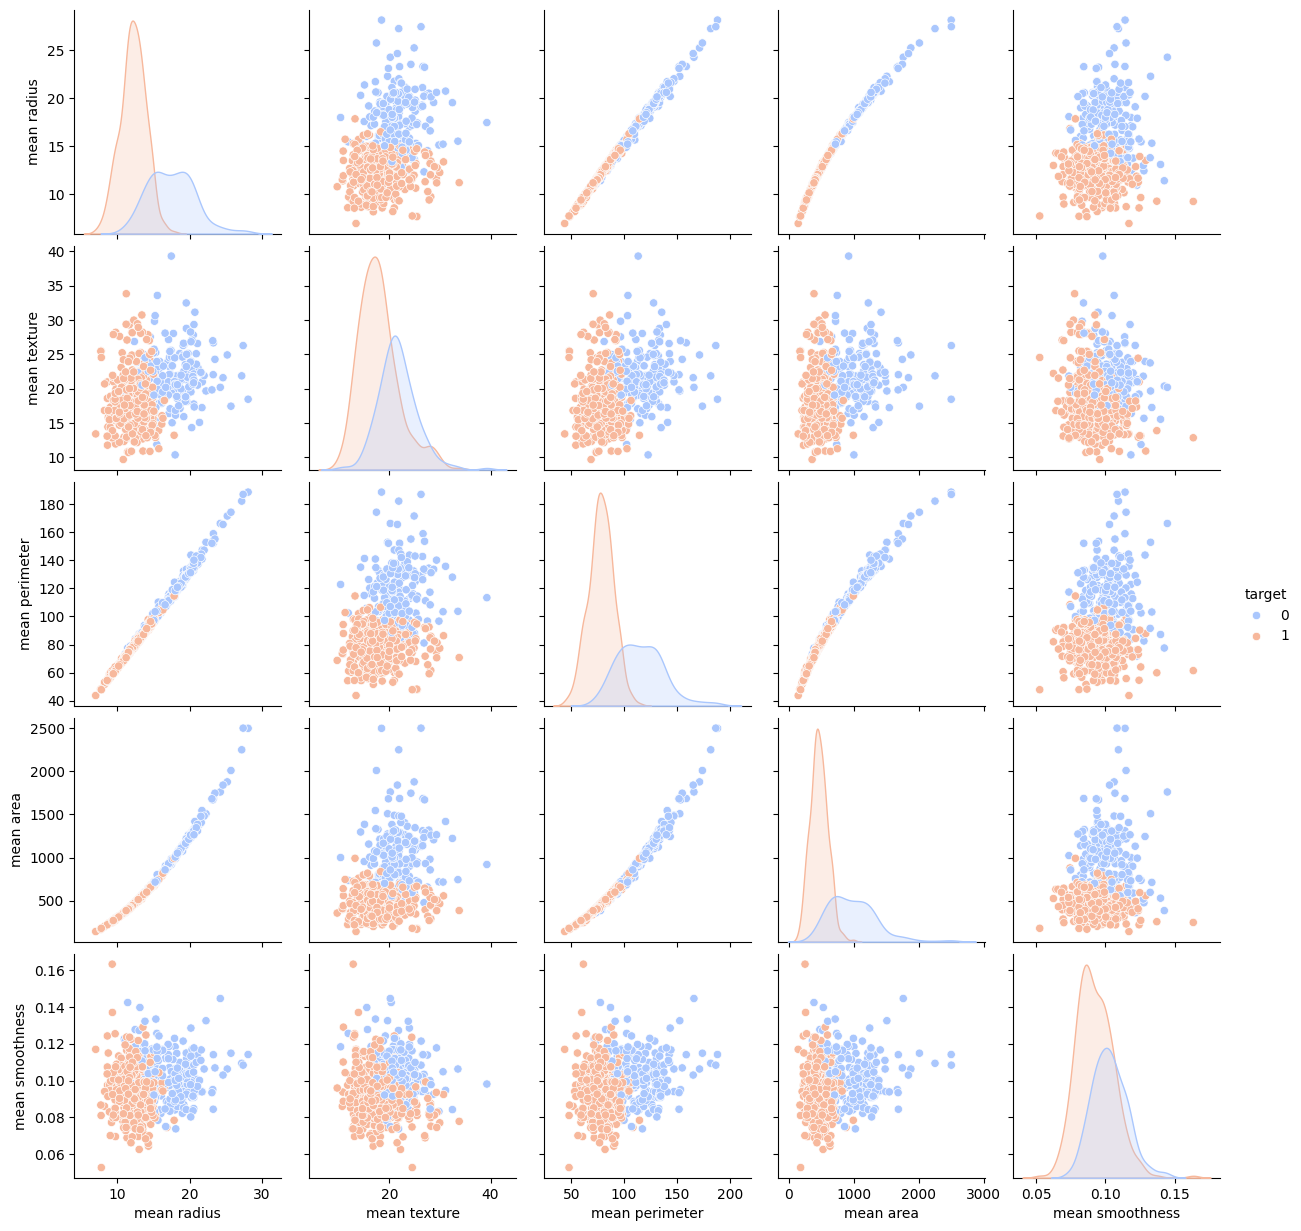

In [5]:
sns.pairplot(df_combined, vars=df.feature_names[:5], hue='target', palette= 'coolwarm')
plt.show()

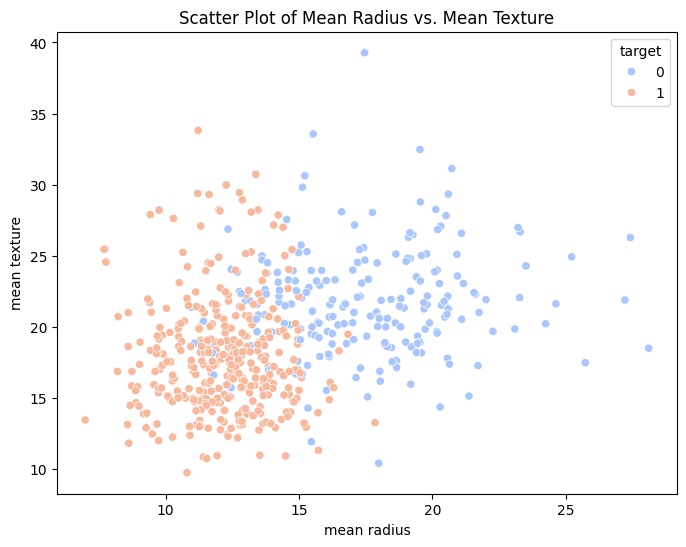

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df_combined, palette='coolwarm')
plt.title('Scatter Plot of Mean Radius vs. Mean Texture')
plt.show()

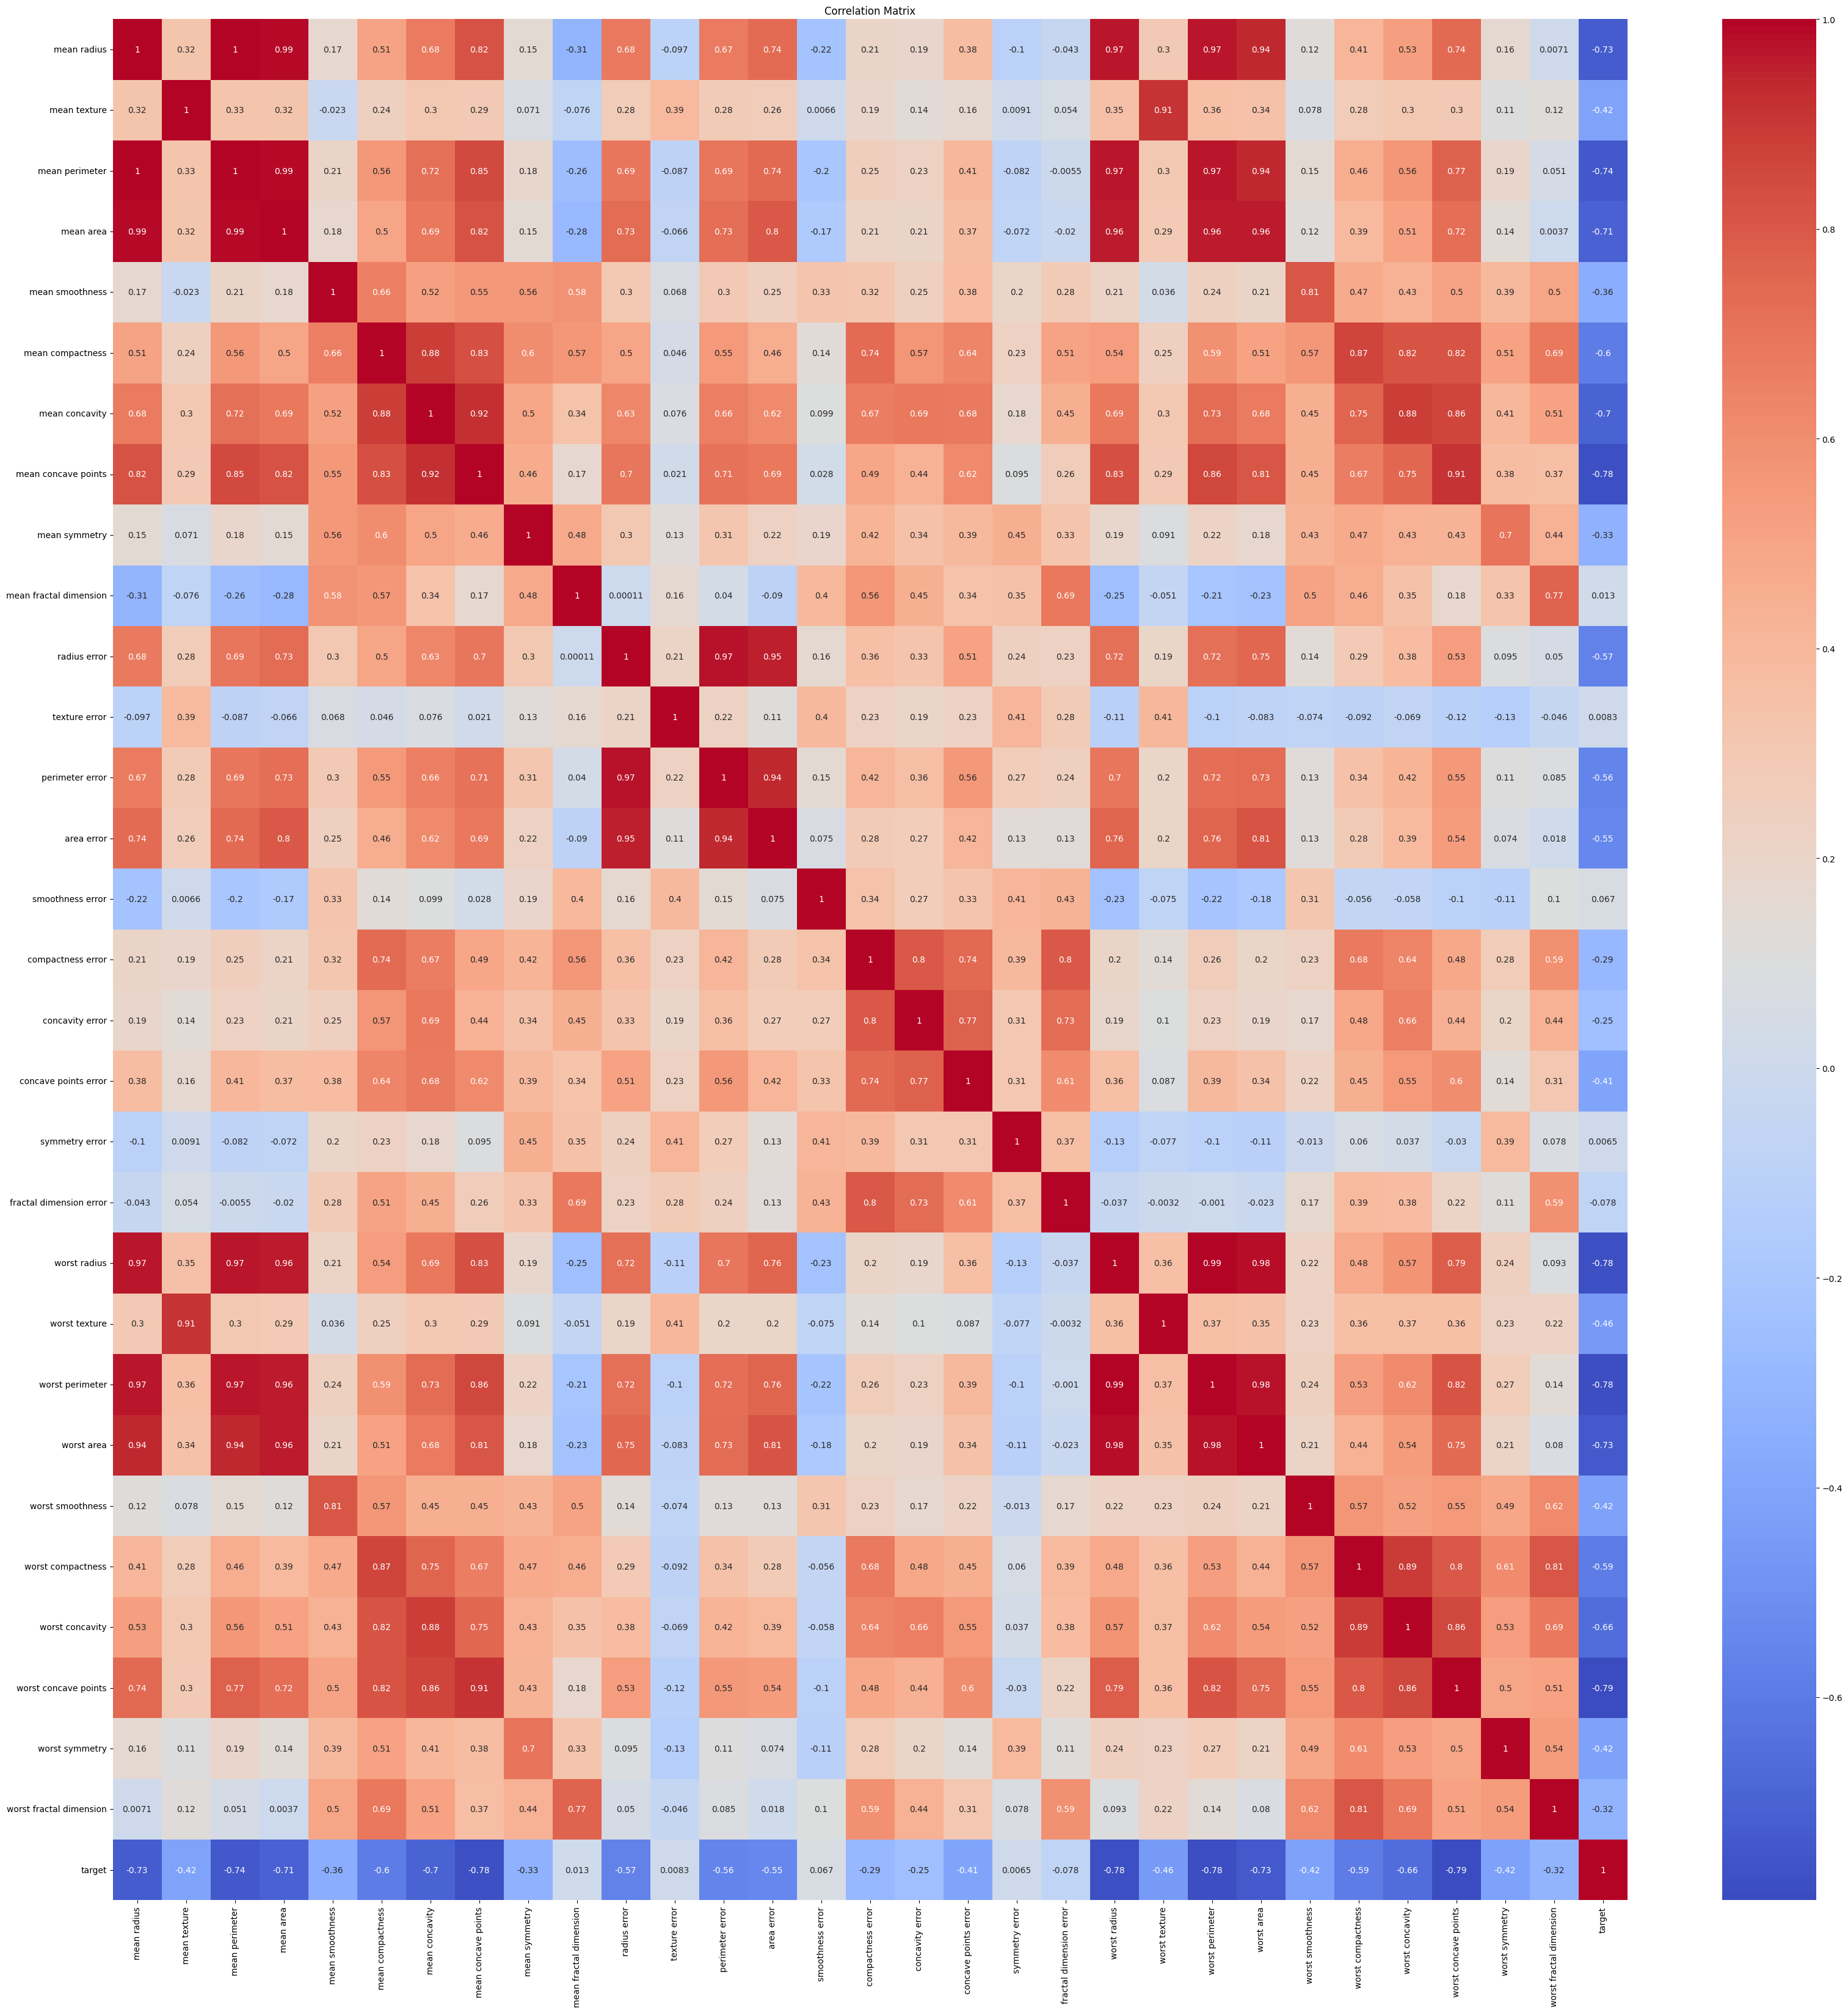

In [7]:
# Correlation matrix
plt.figure(figsize=(40,40))
correlation_matrix = df_combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
correlation_matrix = df_combined.corr()

threshold = 0.8

high_corr_pairs = np.where(np.abs(correlation_matrix) > threshold)

high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated feature pairs:")
for pair in high_corr_pairs:
    print(pair)

Highly correlated feature pairs:
('mean radius', 'mean perimeter')
('mean radius', 'mean area')
('mean radius', 'mean concave points')
('mean radius', 'worst radius')
('mean radius', 'worst perimeter')
('mean radius', 'worst area')
('mean texture', 'worst texture')
('mean perimeter', 'mean area')
('mean perimeter', 'mean concave points')
('mean perimeter', 'worst radius')
('mean perimeter', 'worst perimeter')
('mean perimeter', 'worst area')
('mean area', 'mean concave points')
('mean area', 'area error')
('mean area', 'worst radius')
('mean area', 'worst perimeter')
('mean area', 'worst area')
('mean smoothness', 'worst smoothness')
('mean compactness', 'mean concavity')
('mean compactness', 'mean concave points')
('mean compactness', 'worst compactness')
('mean compactness', 'worst concavity')
('mean compactness', 'worst concave points')
('mean concavity', 'mean concave points')
('mean concavity', 'worst concavity')
('mean concavity', 'worst concave points')
('mean concave points', '

In [9]:

features_to_drop = [
    'mean perimeter', 'mean area', 'worst perimeter', 'worst area', 'worst radius', 
    'worst texture', 'worst smoothness', 'worst compactness', 
    'worst concavity', 'worst concave points', 'worst fractal dimension', 
    'area error', 'perimeter error', 'concavity error', 
    'fractal dimension error'
]

df_reduced = df_features.drop(features_to_drop, axis=1)


df_reduced.columns


Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'smoothness error', 'compactness error', 'concave points error',
       'symmetry error', 'worst symmetry'],
      dtype='object')

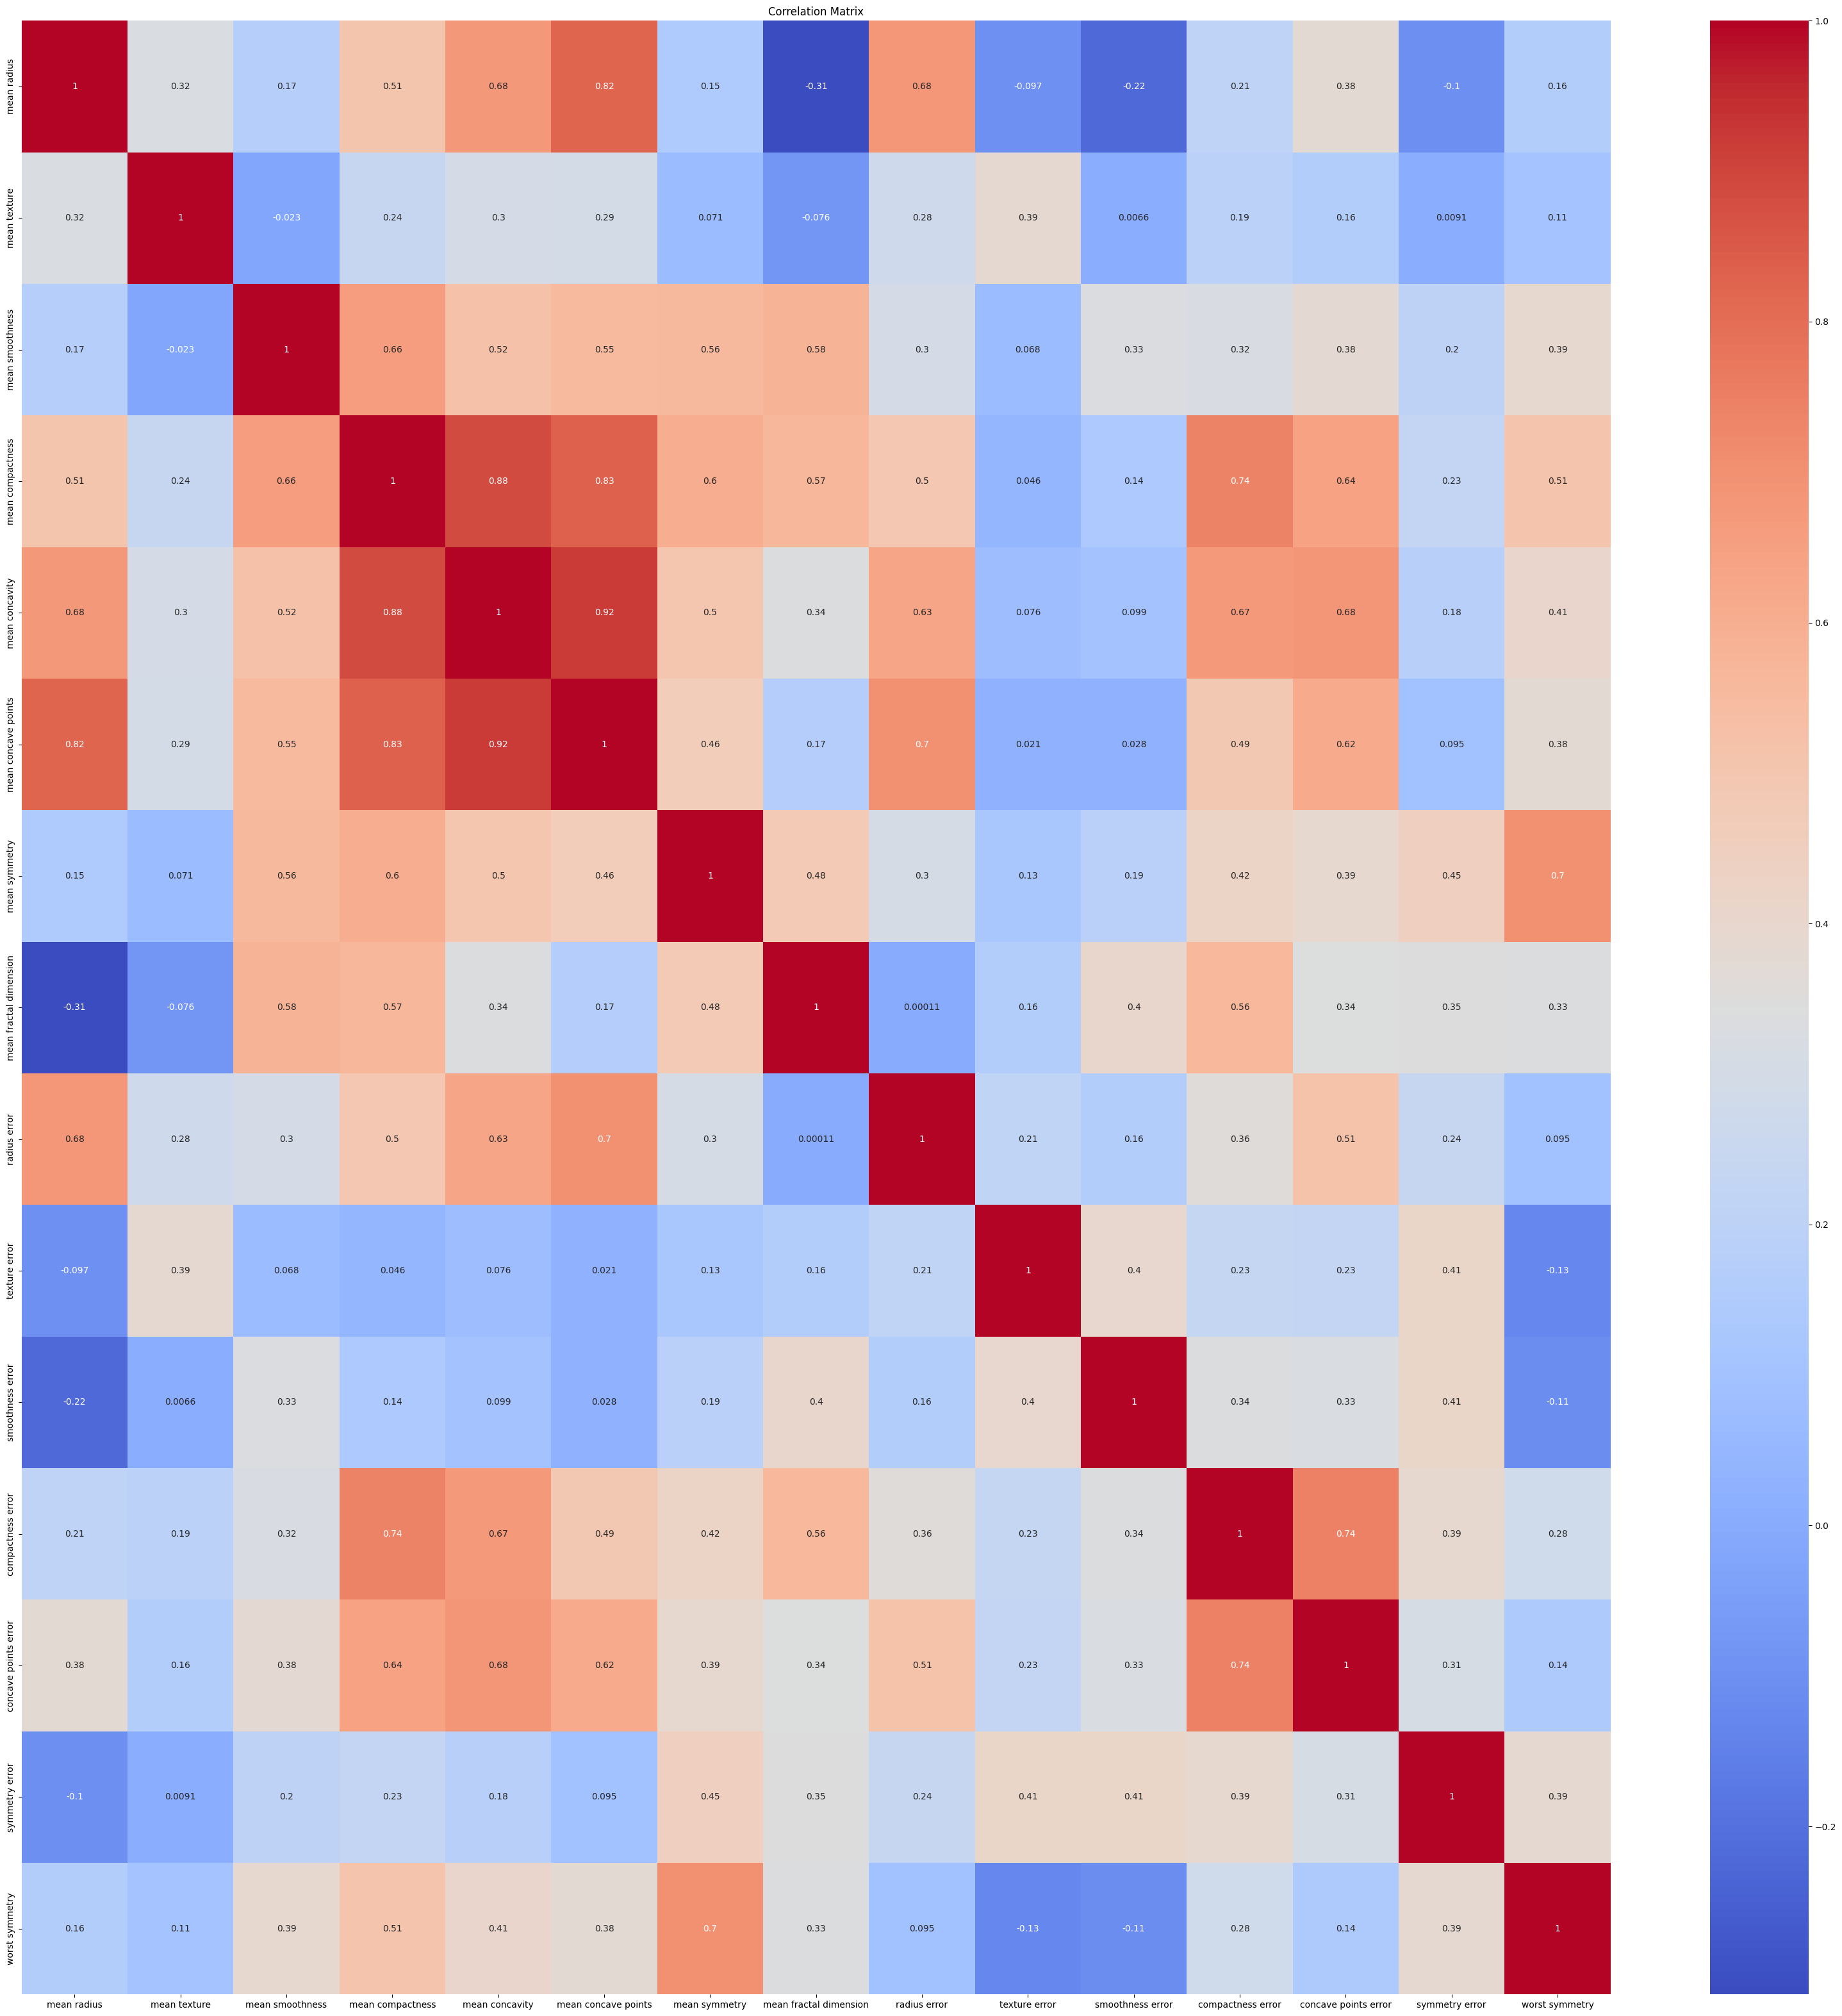

In [10]:
plt.figure(figsize=(40,40))
correlation_matrix = df_reduced.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_reduced), columns=df_reduced.columns)




In [12]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_normalized, df_target, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


"""
print(f"Original y_train distribution: {Counter(y_train)}")
print(f"Resampled y_train distribution: {Counter(y_train_resampled)}")
"""

X_train.value_counts(), X_train_resampled.value_counts()

(mean radius  mean texture  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  smoothness error  compactness error  concave points error  symmetry error  worst symmetry
 -1.827998     1.431228     -0.688901         0.294866          0.046713       -0.909990             0.822855       2.085634               -0.669769      0.475624       2.809788          2.184826           0.299092              0.061472       -0.179178         1
  0.083133    -0.639862      0.081820         0.181157         -0.109596       -0.172540             0.366487       0.187463               -0.202376     -0.809657      -0.821360          0.282346           0.102819             -0.219430        0.246298         1
  0.225140    -1.014519     -1.094545        -0.357254         -0.419453       -0.430995            -0.454976      -0.865817               -0.579538     -1.421454      -1.256711         -0.434717          -0.551048  

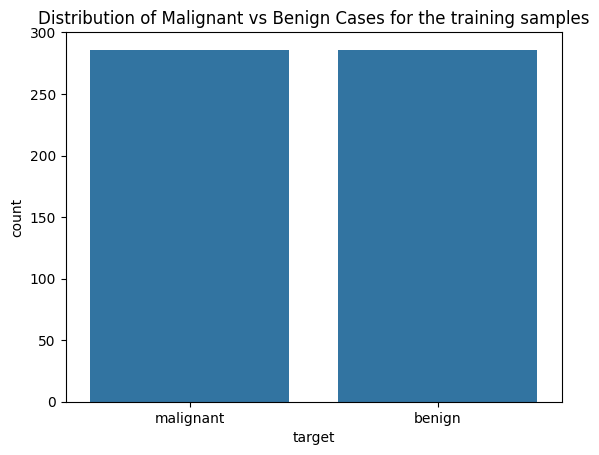

In [13]:
combined = pd.concat([X_train_resampled, y_train_resampled],axis=1)

sns.countplot(x='target',data=combined)
plt.title('Distribution of Malignant vs Benign Cases for the training samples')
plt.xticks([0,1],df.target_names)
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, C=None, penalty=None, solver=None, tol=None, max_it=None):
        """Hyperparameter defined here"""
        self.learning_rate = learning_rate # Gradient Descent
        self.epochs        = epochs        # Gradient Descent 
        self.C             = C             # Regularization strength
        self.penalty       = penalty       # Handling overfitting
        self.solver        = solver        # Optimization of cost function
        self.tol           = tol           # Early stopping
        self.max_it        = max_it        # Early stopping

        """Model parameter defined here"""
        self.weights = None 
        self.bias    = None
        self.losses  = []  # To store the cost function values
    
    def sigmoid(self, z):
        """Function that output the probability of belonging to one class 
           or another given the vector of features z
        """
        return 1 / (1 + np.exp(-z))
    
    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0
    
    def _gradient_descent(self,X,y):
        
    def compute_cost(self, y_true, y_predicted):

        y_true = np.array(y_true)  # Ensure y_true is a numpy array
        y_predicted = np.array(y_predicted)  # Ensure y_predicted is a numpy array
        
        n_samples = len(y_true)
        
        # Avoid log(0) by ensuring predictions are in (0, 1)
        epsilon = 1e-10
        y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)
        
        cost = - (1 / n_samples) * np.sum(
            y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted)
        )
        return cost
    
    
    
    
    """
    def fit(self, X, y):
        X = np.array(X)  # Ensure X is a numpy array
        y = np.array(y)  # Ensure y is a numpy array
        
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)
        
        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Compute the cost
            cost = self.compute_cost(y, y_predicted)
            self.losses.append(cost)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
 
    def predict_proba(self, X):
        X = np.array(X)  # Ensure X is a numpy array
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X):
        y_predicted_probs = self.predict_proba(X)
        y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_probs]
        return np.array(y_predicted)
    """    
"""
model = LogisticRegressionScratch(learning_rate=0.01, epochs=10000)


X_train_resampled = np.random.randn(100, 3)
y_train_resampled = np.random.randint(0, 2, size=100)


model.fit(X_train_resampled, y_train_resampled)
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
#print(f"Accuracy: {accuracy * 100:.2f}%")

plt.plot(model.losses)
plt.title("Cost Function Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()
"""

ValueError: shapes (114,15) and (3,) not aligned: 15 (dim 1) != 3 (dim 0)